<a href="https://colab.research.google.com/github/Siarzis/custom-ai/blob/main/multi_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import numpy as np

import random
import copy

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

# Generate dataset

In [ ]:
# for a single perceptron, the algorithm requires the number of inputs
# to the perceptron as a parameter to be provided

# no_inputs specifices perceptron's number of inputs and is user-defined hyperparameter
inputs = 2

# s value specifies the size of the dataset
s = 1000

training_dataset = np.random.uniform(0, 1, size=(s, inputs+1))

for row in training_dataset:
    if row[1] > row[0]:
        row[2] = 1
    else:
        row[2] = 0

# Plot the dataset

In [ ]:
# Extract horizontal and vertical coordinates from the input values

h_green = []
v_green = []
h_blue = []
v_blue = []

for i, row in enumerate(training_dataset):
    if row[2] == 1:
        h_green.append(training_dataset[i, 0])
        v_green.append(training_dataset[i, 1])
    else:
        h_blue.append(training_dataset[i, 0])
        v_blue.append(training_dataset[i, 1])

# Plot the points
plt.scatter(h_green, v_green, marker='o', s=1, color='green', label='Random Points')
plt.scatter(h_blue, v_blue, marker='o', s=1, color='blue', label='Random Points')
plt.plot([0.0, 1], [0.0, 1], color='black')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Randomly Generated Input Values')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Initialize model & Forward pass



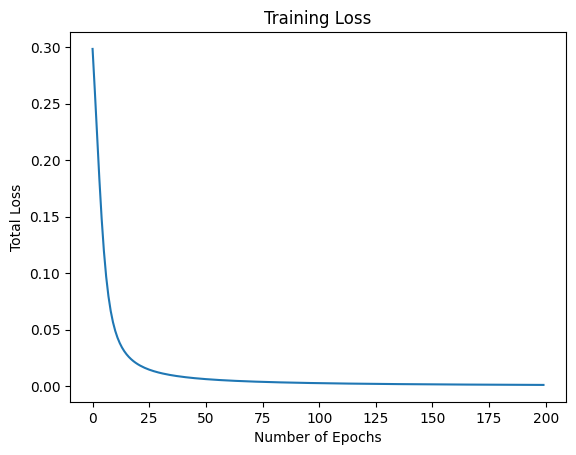

In [ ]:
# configure the learning rate
lr = 2.5

# number of epochs
epochs = 200

# provide number of neurons in each hidden layer
layer_neurons = [inputs, 2, 2]

weights, hidden, bias, node_delta = [], [], [], []

# the number of rows in w represents the number of neuron in each layer
# the number of columns in w represents the number of inputs of the previous layer
for i in range(1, len(layer_neurons)):

    # initialize the neuron weights
    weights.append(np.zeros((layer_neurons[i], layer_neurons[i-1])))

    hidden.append(np.zeros((layer_neurons[i], 1)))

    node_delta.append(np.zeros((layer_neurons[i], 1)))

# X = sample[:2]
# d = sample[2]

X = np.array([[0.05], [0.1]])
d = np.array([[0.01], [0.99]])

hidden.insert(0, X)

# Set up weights and biases
weights = []
weights.append(np.array([[0.15, 0.2], [0.25, 0.3]]))
weights.append(np.array([[0.4, 0.45], [0.5, 0.55]]))

bias = [0.35, 0.6]

total_error = []

# initialize perceptron

for e in range(epochs):
    # forward pass implementation
    for i in range(1, len(hidden)):
        hidden[i] = 1/(1 + 1/np.exp(np.dot(weights[i-1], hidden[i-1])+bias[i-1]))

    # print("Epoch: {}".format(e))
    # print(hidden[-1])

    weights_old = copy.deepcopy(weights)

    # compute the error --- square error function is convenient for the gradient computation
    error = 0.5*((d-hidden[-1]) ** 2)

    total_error.append(error[0][0] + error[1][0])

    # backward pass implementation

    # iterate layer
    for i in range(1, len(layer_neurons)):
        if i == 1:
            # compute error sensitivity to output
            delta_error_output = -(d-hidden[-i])

            delta_output_net = hidden[-i]*(1-hidden[-i])

            node_delta[-i] = delta_error_output * delta_output_net

            delta_net_weight = np.transpose(hidden[-i-1])

            # compute error sensitivity to weight
            de_dw = delta_error_output * delta_output_net * delta_net_weight
        else:
            delta_error_output = np.dot(weights_old[-i+1], node_delta[-i+1])

            delta_output_net = hidden[-i]*(1-hidden[-i])

            node_delta[-i] = delta_error_output * delta_output_net

            delta_net_weight = np.transpose(hidden[-i-1])

            de_dw = delta_error_output * delta_output_net * delta_net_weight

        weights[-i] = weights[-i] - lr*de_dw

# Plotting the list
plt.plot(total_error)

# Adding labels and title
plt.xlabel('Number of Epochs')
plt.ylabel('Total Loss')
plt.title('Training Loss')

# Display the plot
plt.show()

#Test forward pass

In [ ]:
# Simple input data
input_data = np.array([[0.1, 0.5]])

# Set up weights and biases
weights = []
weights.append(np.array([[-0.3, 0.1], [0.4, 0.2]]))
weights.append(np.array([[0.1, -0.1]]))

hidden = np.zeros(2)

X = np.array([[0.05], [0.1]])

# Set up weights and biases
w = []
w.append(np.array([[-0.3, 0.1], [0.4, 0.2]]))
w.append(np.array([[0.1, -0.1]]))

# forward pass implementation
for i in range(len(weights)):
    if i == 0:
        for j in range(weights[i].shape[0]):
            hidden[j] = np.sum(weights[i][j] * input_data)
    else:
        print(hidden)
        for j in range(weights[i].shape[0]):
            y = np.sum(weights[i][j] * hidden)

print(y)